<a href="https://colab.research.google.com/github/lava99-bliss/Tensorflow/blob/main/02_2_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Working with a larger example(multiclass classification)

### here he use fasion mnist dataset
 (60,000 - train, 10,000-test)


In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#dataset is already sorted into test and train
#here we have 10 labels(classes)

In [30]:
(train_data,train_labels) , (test_data,test_labels) = fashion_mnist.load_data()

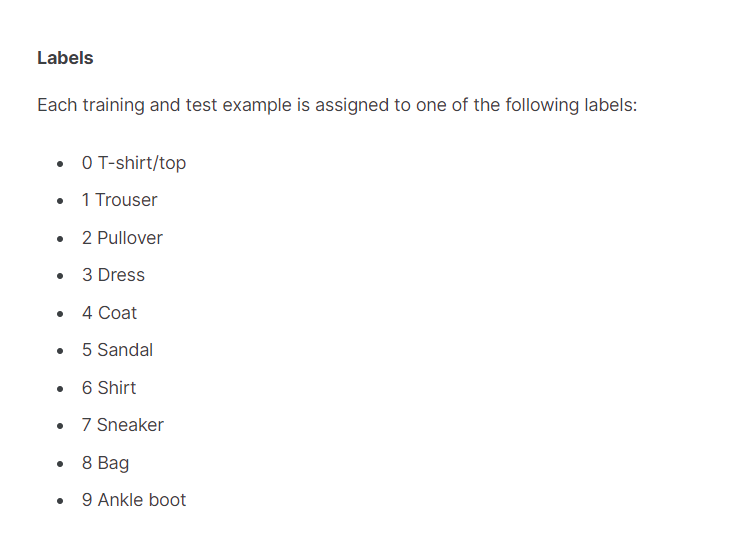

In [31]:
print(f"1st input data in the set(training set): {train_data[0]} ")

1st input data in the set(training set): [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0  

In [32]:
print(f"1st label data in the set(training set): {train_labels[0]} ")

1st label data in the set(training set): 9 


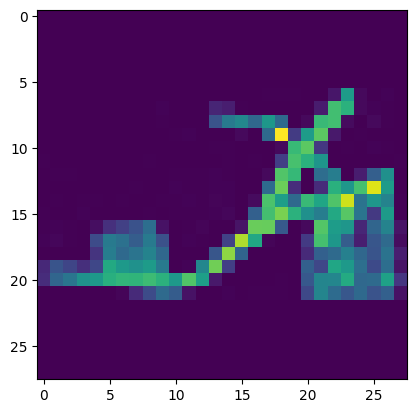

In [33]:
#plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[1900])

In [34]:
#create a small list so we can list index of labels to names

class_name= ["T-shirt/top" ,"Trouser", "Pullover" ,"Dress" , "Coat", "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Text(0.5, 1.0, 'Dress')

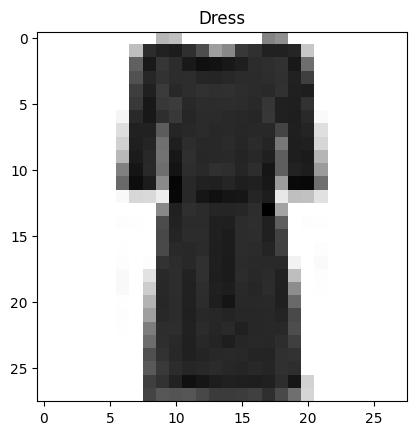

In [35]:
#plot an example wimage and its label

index_of_choice = 47
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary) #turn the label into b&w
label=train_labels[index_of_choice]
plt.title(class_name[label])

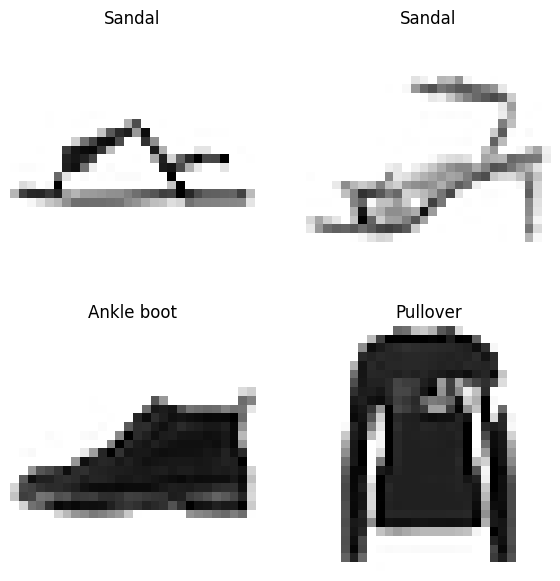

In [36]:
#plot random 4 images
import random
plt.figure(figsize=(7,7))

for i in range(4):
  ax= plt.subplot(2,2,i+1) #rows,cols,key
  rand_index= random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis("off")

#Building a multiclass classification model

input shape = 28 * 28

output shape = 10 (one per class)

Loss = tf.keras.losses.CategoricalCrossentropy()

output = softmax (not sigmoid)




In [37]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history= model_11.fit(train_data, train_labels, epochs=20, validation_data=(test_data,test_labels))

Epoch 1/20


ValueError: ignored

If your labels are,

1.   One-hot encoded -> use SparseCategoricalCrossentropy
2.   integers -> use CategoricalCrossentropy



In [41]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

non_norm_history= model_11.fit(train_data, train_labels, epochs=10, validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3073 - accuracy: 0.1168 - val_loss: 2.2438 - val_accuracy: 0.1253
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0700 - accuracy: 0.1742 - val_loss: 1.8352 - val_accuracy: 0.2117
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7630 - accuracy: 0.2434 - val_loss: 1.6963 - val_accuracy: 0.2683
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6836 - accuracy: 0.2785 - val_loss: 1.6579 - val_accuracy: 0.2845
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6483 - accuracy: 0.2845 - val_loss: 1.6579 - val_accuracy: 0.2766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6278 - accuracy: 0.2860 - val_loss: 1.6115 - val_accuracy: 0.2928
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6176 - accuracy: 0.2909 - val_loss: 1.6094 - val_accuracy:

In [42]:
#model summary
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


#Normalize data

In [43]:
#check the min and max in training set
train_data.min(), train_data.max()

(0, 255)

NN prefer data to be in 0-1 to realize the features (normalized form-scaled)

we can do that by data dividing by max

In [44]:
train_data_norm= train_data/255.0
test_data_norm= test_data/255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [45]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history= model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3520 - accuracy: 0.4936 - val_loss: 1.0752 - val_accuracy: 0.6289
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9922 - accuracy: 0.6513 - val_loss: 0.9423 - val_accuracy: 0.6623
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8980 - accuracy: 0.6887 - val_loss: 0.8832 - val_accuracy: 0.6779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8495 - accuracy: 0.7043 - val_loss: 0.8300 - val_accuracy: 0.7023
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7873 - accuracy: 0.7267 - val_loss: 0.7789 - val_accuracy: 0.7352
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7142 - accuracy: 0.7463 - val_loss: 0.7218 - val_accuracy: 0.7449
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6822 - accuracy: 0.7532 - val_loss: 0.7082 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

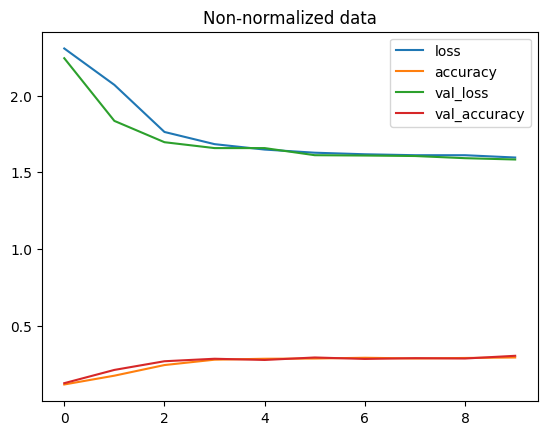

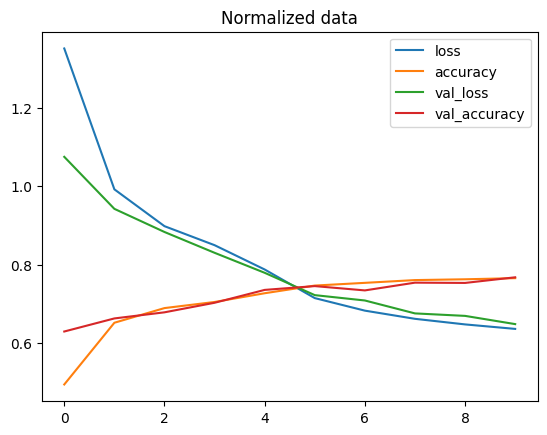

In [46]:
import pandas as pd
 #plot non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")

The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you are comparing them on the same criteria

#Find the ideal lr

In [47]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#create a lr callback
lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10(epoch/20))

find_lr_history= model_12.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm,test_labels))

<>:14: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:14: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-47-fef46baddad4>:14: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  lr_sheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10(epoch/20))


Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4473 - accuracy: 0.4292 - val_loss: 1.2273 - val_accuracy: 0.5079
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0609 - accuracy: 0.5635 - val_loss: 0.9471 - val_accuracy: 0.6189
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8735 - accuracy: 0.6583 - val_loss: 0.8434 - val_accuracy: 0.6999
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7878 - accuracy: 0.6996 - val_loss: 0.7847 - val_accuracy: 0.7237
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7275 - accuracy: 0.7446 - val_loss: 0.7133 - val_accuracy: 0.7556
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6580 - accuracy: 0.7775 - val_loss: 0.6693 - val_accuracy: 0.7772
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6159 - accuracy: 0.7922 - val_loss: 0.6627 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

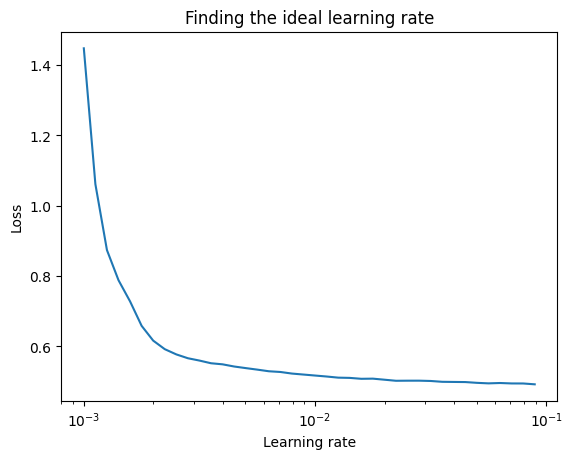

In [48]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")



In [52]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.005),
                 metrics=["accuracy"])

history_14= model_14.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0575 - accuracy: 0.5921 - val_loss: 0.7662 - val_accuracy: 0.6980
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6919 - accuracy: 0.7476 - val_loss: 0.6765 - val_accuracy: 0.7650
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6283 - accuracy: 0.7740 - val_loss: 0.6481 - val_accuracy: 0.7637
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6026 - accuracy: 0.7849 - val_loss: 0.6270 - val_accuracy: 0.7734
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5878 - accuracy: 0.7933 - val_loss: 0.6385 - val_accuracy: 0.7788
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5755 - accuracy: 0.7987 - val_loss: 0.6123 - val_accuracy: 0.7869
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5676 - accuracy: 0.8019 - val_loss: 0.5979 - val_accuracy:

#Evaluating multi class model

In [56]:
#create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix



def make_confusion_matricx(y_true,y_pred,classes=None, figsize=(10,10),text_size=15):
#confusion_matrix
cm=confusion_matrix(y_true,y_preds)
cm_norm=cm.astype("float") / cm.sum(axis=1) [: , np.newaxis] #normalize cm
n_classes=cm.shape[0]

#prettify it
fig,ax = plt.subplots(figsize=figsize)
#create matricx plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

ax.set(title="Confusion matrics",
       xlabel="Predicted Label",
       ylabel="true Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xtickslabels=labels,
       ytickslabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()